<a href="https://colab.research.google.com/github/rohankalbag/EE325-Assignment-Repo/blob/main/Assignment%203/DS203A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> **Author** - Asif Shaikh </br>
> **Ldap ID** - 20D070017 </br>
> **Course** - DS203 **Assignment 7**

References:
 
1.   https://scikit-learn.org/stable/index.html   
2.   https://pandas.pydata.org/docs/
3.   https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e
4.   https://towardsdatascience.com/cheat-sheet-for-google-colab-63853778c093
5.   https://stats.stackexchange.com/questions/43943/which-search-range-for-determining-svm-optimal-c-and-gamma-parameters
6.   https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
***

# **Q1**
> Categorize the following problems into <code><b>Classification</b></code>, <code><b>Regression</b></code>, <code><b>Clustering</b></code> or <code><b>Dimension Reduction</b></code>,
while also noting down the input and output variables:<br>
<ol type = 'a'>
<li>  Summarize the grades of all 50 courses that a student using 5 numbers assuming that the performance on some of the courses might be correlated.
<ol>
<li><i>problem type</i> - <code><b>Dimension Reduction</b></code></li>
<li><i>input variable</i> - Grades in 50 courses</li>
<li><i>output variable</i> - Summary in 5 tuples</li>
</ol>
</li>
<li>
Divide students into unspecified personality groups based student based on their performance in various courses and extra-curricular activities.
<ol>
<li><i>problem type</i> - <code><b>Classification</b></code></li>
<li><i>input variable</i> - list of students, </li>
<li><i>output variable</i> - n disjoint sets of students, n = number of groups</li>
</ol>
</li>
<li>
Predict the salary of a student after two years of graduating based on his/her performance in various courses, extra-curricular activities, and their first job type.
<ol>
<li><i>problem type</i> - <code><b>Regression</b></code></li>
<li><i>input variable</i> - Set of courses taken with grades, set of extracurricular activities participated in, Type of first job</li>
<li><i>output variable</i> - Predicted salary in currency units</li>
</ol>
</li>
<li>
Predict the best type of job for a student based on his/her performance in various courses and extra-curricular activities.
<ol>
<li><i>problem type</i> - <code><b>Classification</b></code></li>
<li><i>input variable</i> - Set of courses taken with grades, set of extracurricular activities participated in</li>
<li><i>output variable</i> - Type of job</li>
</ol>
</li>

***

# **Q2**

***

# **Q3** 
# **Predicting RATINGS of clothing items based on product prices**

Dataset used - [Summer Products and Sales in E-Commerce wish](https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish)

***



In [1]:
# import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

from tabulate import tabulate
import copy
import random
from tqdm.auto import tqdm

from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
# Format matplotlib for good looking plots
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS203/summer-products-with-rating-and-performance_2020-08.csv')

In [4]:
# Display dataset
df.head(4)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.0,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.0,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08


## **Observations about the dataset**
- The given dataset contains **1573 entries** and **43 columns**.
- The <code>**rating**</code> column will be the **label** or the **target variable** for this problem.
- We will train **Neural Networks**, **Support Vector Machine Regresor** and **K Nearest Neighbor Regressor** models for this problem.
- We will use the **$\mathbf{r^2}$ score** as the measure of the model's performance. SKLearn uses  $\mathbf{r^2}$ score as the default score for any regression model's performance.

min value      - 1.00
lower quartile - 3.55
upper quartile - 4.11
max value      - 5.00
mean           - 3.82
std deviation  - 0.52


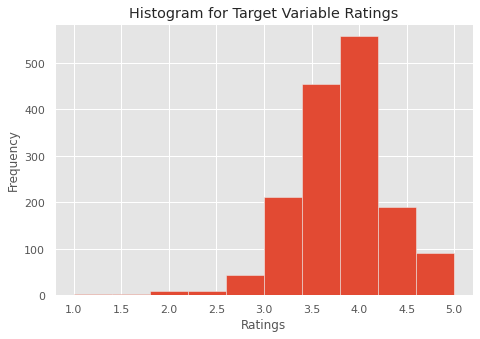

In [5]:
# Some stats about the Target Variable
plt.rcParams['figure.figsize'] = (7.5,5)
plt.hist(df['rating'], bins = 10)
plt.title('Histogram for Target Variable Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

print('min value      - {:0.2f}'.format(df['rating'].min()))
print('lower quartile - {:0.2f}'.format(df['rating'].quantile(.25)))
print('upper quartile - {:0.2f}'.format(df['rating'].quantile(.75)))
print('max value      - {:0.2f}'.format(df['rating'].max()))
print('mean           - {:0.2f}'.format(df['rating'].mean()))
print('std deviation  - {:0.2f}'.format(df['rating'].std()))

### **Some Statistics for target variable Ratings**
- Ratings are **continuous**.
- This makes predicting ratings a **Supervised  Regression** problem.


In [6]:
# Display Information about all 
table = []
for i,col in enumerate(df.columns):
  name = col
  num_unique = len(set(df[col]))
  num_missing = sum(pd.isna(df[col]))
  if(pd.to_numeric(df[col], errors='coerce').notnull().all()):
    mean = df[col].mean()
    std = df[col].std()
    Min = df[col].min()
    Max = df[col].max()
    lower_q = df[col].quantile(0.25)
    upper_q = df[col].quantile(0.75)
  else:
    mean = None
    std = None
    Min = None
    Max = None
    lower_q = None
    upper_q = None
  table.append([i+1,name,num_unique,num_missing,mean,std,Min,lower_q,upper_q,Max])
print(tabulate(table,headers = ['No.','Name','# Unique', '# Missing','Mean','Standard Deviation','Minimum','Lower Q','Upeer Q','Maximum'],floatfmt='1.2f'))

  No.  Name                            # Unique    # Missing      Mean    Standard Deviation    Minimum    Lower Q    Upeer Q     Maximum
-----  ----------------------------  ----------  -----------  --------  --------------------  ---------  ---------  ---------  ----------
    1  title                               1201            0
    2  title_orig                          1203            0
    3  price                                127            0      8.33                  3.93       1.00       5.81      11.00       49.00
    4  retail_price                         104            0     23.29                 30.36       1.00       7.00      26.00      252.00
    5  currency_buyer                         1            0
    6  units_sold                            15            0   4339.01               9356.54       1.00     100.00    5000.00   100000.00
    7  uses_ad_boosts                         2            0      0.43                  0.50       0.00       0.00       1.00  

## **Droping features**

From the above mentioned columns, various columns can be dropped due to the following reasons:

### **Based on definition**(given on kaggle for all the columns):
- The columns giving the number of ratings with value 5 to 1 indirectly leak the label into the model. Hence we need to remove these columns - <code>**rating_five_count**</code>, <code>**rating_four_count**</code>, ... , <code>**rating_one_count**</code>
- It is difficult to extract useful insight from features that are mostly unique for each product, hence we can drop the <code>**title**</code>, <code>**title_orig**</code> , <code>**product_url**</code> and the <code>**product_picture**</code>columns.
- Amongst the data given about the merchant, <code>**merchant_title**</code>, <code>**merchant_name**</code> and the <code>**merchant_id**</code> might not be very insightful in predicting the ratings.
-  The column <code>**merchant_info_subtitle**</code> contains two peices of unprocessed data in the form of a single string. One is the *number of merchant reviews* which is the same as <code>**merchant_rating_count**</code> and the other is the *% positive feedbacks* which is should be similar to <code>**merchant_rating**</code>. Also the % positive reviews are missing for a lot of columns are missing. Hence we can safely drop this column too.

### **Base on satistics**:
- Columns containing just one value can be removed (<code>**currency_buyer**</code>, <code>**theme**</code>, <code>**crawl_month**</code>)
- Columns missing a lot of entries. (<code>**has_urgency_banner**</code>, <code>**urgency_text**</code> and <code>**merchant_profile_picture**</code>)
- Columns having highly skewed data.

In [7]:
### Drop the columns based on definition
dropped_cols = ['rating_five_count', 'rating_four_count', 'rating_three_count','rating_two_count', \
                'rating_one_count','title', 'title_orig','product_url', 'product_picture', 'product_id',\
                 'merchant_title', 'merchant_name', 'merchant_id','merchant_info_subtitle']
df = df.drop(columns = dropped_cols )

In [8]:
# Find the columns with any values missing and record the number of values
sparse_cols = []
percent_sparse = []

for col in df.columns:
  fract_sparse = sum(pd.isna(df[col]))/len(df)
  if(fract_sparse>0):
    sparse_cols.append(col)
    percent_sparse.append(fract_sparse*100)

In [9]:
t_cols = [[i+1,sparse_cols[i],percent_sparse[i]] for i in range(0,len(sparse_cols))]
print(tabulate(t_cols,headers = ["No.","Column Name", "% Values Missing"], floatfmt="1.2f"))

  No.  Column Name                  % Values Missing
-----  -------------------------  ------------------
    1  product_color                            2.61
    2  product_variation_size_id                0.89
    3  has_urgency_banner                      69.93
    4  urgency_text                            69.93
    5  origin_country                           1.08
    6  merchant_profile_picture                85.63


### **Observations**
- Based on the above statistics, columns <code>**has_urgency_banner**</code>, <code>**urgency_text**</code> and <code>**merchant_profile_picture**</code> should be dropped as they are missing a lot of values
- If the number of rows missing entries is also low, they should also be dropped.

In [10]:
# DROP SPARSE COLUMNS
df = df.drop(columns = ['has_urgency_banner','urgency_text','merchant_profile_picture'])

In [11]:
# Calculate number of columns with missing entries
num_sparse_cols = sum([sum(pd.isna(df.iloc[i])) for i in range(len(df))])
print('Number of rows with missing entries =  {}'.format(num_sparse_cols))

Number of rows with missing entries =  72


In [12]:
# DROP SPARSE ROWS
df = df.drop(index = [i for i in range(len(df)) if sum(pd.isna(df.iloc[i])>0)])
df.set_index(np.array(range(len(df))),inplace=True)

## **Calculate diversity in remaining features**.

In [13]:
def entropy(col):
  uniq_vals = set(col)
  freqs = [sum(col == name) for name in uniq_vals]
  ps = np.array(freqs)
  ps = ps/sum(ps)
  entr = sum(-ps*np.log(ps))
  return entr, freqs, len(uniq_vals)

In [14]:
stats_tab = []
for i,col in enumerate(df.columns):
  entr, freqs, num_types = entropy(df[col])
  if (len(freqs)>20):
    freqs = "too long"
  else:
    freqs.sort()
  stats_tab.append([i+1, col, num_types, entr, freqs])

for i in range(len(stats_tab)):
  for j in range(i,len(stats_tab)):
    if (stats_tab[i][3]>stats_tab[j][3]):
      stats_tab[i][0] = j+1
      stats_tab[j][0] = i+1
      t = copy.deepcopy(stats_tab[i])
      stats_tab[i] = copy.deepcopy(stats_tab[j])
      stats_tab[j] = copy.deepcopy(t)

print(tabulate(stats_tab, headers = ["No.", "Feature", "# Unique Values", "Entropy", "Frequencies of unique vaules"], floatfmt="0.2f"))

  No.  Feature                         # Unique Values    Entropy  Frequencies of unique vaules
-----  ----------------------------  -----------------  ---------  ---------------------------------------------------------
    1  currency_buyer                                1       0.00  [1503]
    2  theme                                         1       0.00  [1503]
    3  crawl_month                                   1       0.00  [1503]
    4  shipping_is_express                           2       0.01  [2, 1501]
    5  inventory_total                               8       0.04  [1, 1, 1, 1, 1, 1, 2, 1495]
    6  badge_fast_shipping                           2       0.06  [17, 1486]
    7  badge_local_product                           2       0.08  [24, 1479]
    8  origin_country                                6       0.14  [1, 1, 2, 5, 30, 1464]
    9  badge_product_quality                         2       0.26  [107, 1396]
   10  shipping_option_name                         14      

### **OBSERVATIONS**
- The columns <code>**currency_buyer**</code>, <code>**theme**</code> and <code>**crawl_month**</code> have just one unique value and thus, MUST be dropped.
- Apart from these, the columns <code>**shipping_is_express**</code>, <code>**inventory_total**</code>, <code>**badge_fast_shipping**</code>, <code>**badge_local_product**</code>, <code>**origin_country**</code> <code>**shipping_option_name**</code> and <code>**badge_product_quality**</code> have very small entropies or very less diversity.
- Amongst the features mentioned above, all except <code>**badge_product_quality**</code> have highly skewed values. Hence these columns are also dropped.

In [15]:
drop_cols = [stats_tab[i][1] for i in range(len(stats_tab)) if stats_tab[i][3]<0.27]
drop_cols.remove('badge_product_quality')
df = df.drop(columns = drop_cols)

In [16]:
df

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,16.00,14,100,0,3.76,54,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,4,34,568,4.128521,0
1,8.00,22,20000,1,3.45,6135,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,2,41,17752,3.899673,0
2,8.00,43,100,0,3.57,14,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,3,36,295,3.989831,0
3,8.00,8,5000,1,4.03,579,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,2,41,23832,4.020435,0
4,2.72,3,100,1,3.10,20,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,1,35,14482,4.001588,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,6.00,9,10000,1,4.08,1367,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,2,41,5316,4.224605,0
1499,2.00,56,100,1,3.07,28,0,0,"Summer,Panties,Elastic,Lace,Casual pants,casua...",lightblue,S,2,1,26,4435,3.696054,0
1500,5.00,19,100,0,3.71,59,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",white,SIZE S,15,2,11,210,3.961905,0
1501,13.00,11,100,0,2.50,2,0,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",white,Size S.,36,3,29,31,3.774194,0


## **Processing remaing columns**
- The non-numerical data-types remaining are <code>**tags**</code>,<code>**product_color**</code> and <code>**product_variation_size_id**</code>
- We will use ***One-Hot-Encoding*** to represent theses features.

In [17]:
# One HOT encoding for product color
# We have used only those colors which appear atleast 5 times in the dataset
min_freq_colors = 10
unique_colors = set(df['product_color'])
freqs = [sum(df['product_color'] == color) for color in unique_colors]

num_colors = sum(np.array(freqs)>min_freq_colors-1)
used_colors = [color for i,color in enumerate(unique_colors) if freqs[i]>min_freq_colors-1]

color_dictionary = {}
for i,color in enumerate(used_colors):
  color_dictionary[color] = i+1
for color in unique_colors:
  if color not in used_colors:
    color_dictionary[color] = 0

In [18]:
def one_hot_color(color):
  vect = [0]*(num_colors+1)
  vect[color_dictionary[color]] = 1
  return vect

df['one_hot_color'] = df['product_color'].apply(one_hot_color)

In [19]:
df['product_variation_size_id'] = [size.lower() for size in df['product_variation_size_id']]
df['product_variation_size_id'] = [size.replace('SIZE','') for size in df['product_variation_size_id']]
df['product_variation_size_id'] = [size.replace('.','').replace(' ','').replace('-','').replace('/','') for size in df['product_variation_size_id']]

In [20]:
# One HOT encoding for product sizes
# We have used only those sizes which appear atleast 10 times in the dataset
min_freq_sizes = 10
unique_sizes = set(df['product_variation_size_id'])
freqs = [sum(df['product_variation_size_id'] == size) for size in unique_sizes]

num_sizes = sum(np.array(freqs)>min_freq_sizes-1)
used_sizes = [size for i,size in enumerate(unique_sizes) if freqs[i]>min_freq_sizes-1]

size_dictionary = {}
for i,size in enumerate(used_sizes):
  size_dictionary[size] = i+1
for size in unique_sizes:
  if size not in used_sizes:
    size_dictionary[size] = 0

In [21]:
def one_hot_size(size):
  vect = [0]*(num_sizes+1)
  vect[size_dictionary[size]] = 1
  return vect

df['one_hot_size'] = df['product_variation_size_id'].apply(one_hot_size)

In [22]:
# ONE HOT ENCODING FOR TAGS
df['tags'] = [x.lower() for x in df['tags']]
tags = [x for tag in df['tags'] for x in tag.split(',')]
unique_tags = set(tags)
freqs = [sum([tag == utag for tag in tags]) for utag in unique_tags]
min_freq_tags = 10
num_tags = sum(np.array(freqs)>min_freq_tags-1)
used_tags = [tag for i,tag in enumerate(unique_tags) if freqs[i]>min_freq_tags-1]

tag_dictionary = {}
for i,tag in enumerate(used_tags):
  tag_dictionary[tag] = i+1
for tag in unique_tags:
  if tag not in used_tags:
    tag_dictionary[tag] = 0

In [23]:
def one_hot_tags(tag):
  vect = [0]*(num_tags+1)
  for a_tag in tag.split(','):
    vect[tag_dictionary[a_tag]] += 1
  return vect

df['one_hot_tags'] = [one_hot_tags(tags) for tags in df['tags']]

### **Final Features**

In [24]:
df = df.drop(columns = ['tags','product_color','product_variation_size_id'])
df

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,product_variation_inventory,shipping_option_price,countries_shipped_to,merchant_rating_count,merchant_rating,merchant_has_profile_picture,one_hot_color,one_hot_size,one_hot_tags
0,16.00,14,100,0,3.76,54,0,0,50,4,34,568,4.128521,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0]","[12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,8.00,22,20000,1,3.45,6135,0,0,50,2,41,17752,3.899673,0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,8.00,43,100,0,3.57,14,0,0,1,3,36,295,3.989831,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0]","[8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,8.00,8,5000,1,4.03,579,0,0,50,2,41,23832,4.020435,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0]","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,2.72,3,100,1,3.10,20,0,0,1,1,35,14482,4.001588,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,6.00,9,10000,1,4.08,1367,0,0,50,2,41,5316,4.224605,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0]","[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
1499,2.00,56,100,1,3.07,28,0,0,2,1,26,4435,3.696054,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ..."
1500,5.00,19,100,0,3.71,59,0,0,15,2,11,210,3.961905,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0]","[2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1501,13.00,11,100,0,2.50,2,0,0,36,3,29,31,3.774194,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0]","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


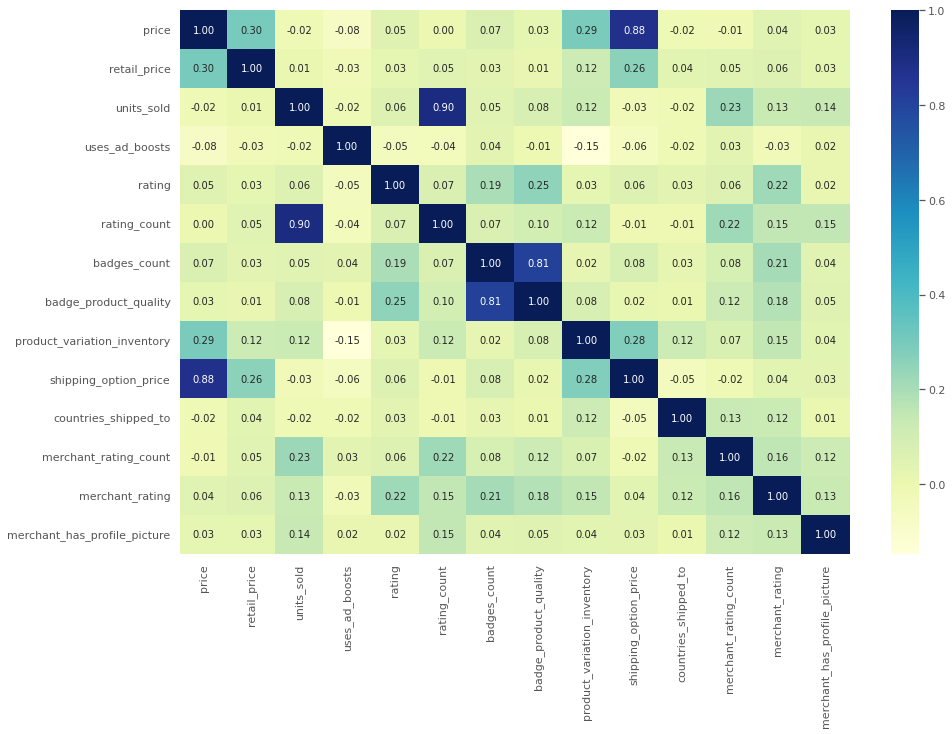

In [25]:
corr = df.corr()
plt.rcParams['figure.figsize'] = (15,10)
ax = sns.heatmap(corr, annot=True, fmt="1.2f", cmap="YlGnBu")

### **Observation**
- Features <code>**price**</code> and <code>**shipping_option_price**</code> have high correlation.
- Features <code>**rating_count**</code> and <code>**units_sold**</code> also have a high correlation.
- One amongst these feature pairs can be dropped, but we choose not to.

In [26]:
def conv_numpy(df0,reg_columns,one_hot_columns):
  array = np.zeros((len(df0),len(reg_columns)+sum([len(df0[col][0]) for col in one_hot_columns])))
  for i in range(len(df0)):
    for j,col in enumerate(reg_columns):
      array[i][j] = df0[col][i]
    ittr = len(reg_columns)
    for col in one_hot_columns:
      for j,item in enumerate(df0[col][i]):
        array[i][ittr] = item
        ittr+=1    
  return np.array(array)

In [27]:
nump_Y_df = df['rating'].to_numpy()
nump_Y_df = nump_Y_df.reshape(-1,1)

In [28]:
reg_columns = list(df.columns[:-3])
one_hot_columns = list(df.columns[-3:])
reg_columns.remove('rating')
nump_X_df = conv_numpy(df,reg_columns,one_hot_columns)

In [29]:
nump_X_df = nump_X_df - sum(nump_X_df)/nump_X_df.shape[0]
nump_X_df = nump_X_df/sum(nump_X_df**2/nump_X_df.shape[0])**0.5
nump_X_df.shape

(1503, 335)

### **Test-Validation-Train Split**
Split the data into test-validation-train sets randomly in $0.7 : 0.15 : 0.15$ ratio

In [30]:
X_train, X_testval, y_train, y_testval = train_test_split(nump_X_df, nump_Y_df, test_size=0.3, random_state=42)

In [31]:
X_val, X_test, y_val, y_test = train_test_split(X_testval, y_testval, test_size = 0.5, random_state = 42)

In [32]:
print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)

(1052, 335)
(1052, 1)
(225, 335)
(225, 1)
(226, 335)
(226, 1)


## **Neural Network with one hidden layer**
- The paramters used for grid-search are the <code>**hidden layer size**</code>, <code>**activation**</code> and the <code>**regularization parameter**</code>.
- The best model obtained uses logistic (sigmoid) activation. ReLU activation is the worst as we know that the output of the model is bounded between 0 to 5.
- The validation score differs from the test scores by a lot. This might have happent because our model has overfitted the validation set.
- The overall score of the model is very low and cannot be used for real-life applications.
- The Neural Network model shows poor performance because of low amount of data availability. Neural Network models tend to overfit on smaller datasets.

In [33]:
from sklearn.neural_network import MLPRegressor

In [34]:
# Parameters for grid search
tuning_params = [{'hidden_layer_sizes' : [100,200,300,400,500,600,700,800,900,1000], 'activation' : 'relu', 'reg_param' : 0.5**np.array(list(range(-5,5)))},\
                 {'hidden_layer_sizes' : [100,200,300,400,500,600,700,800,900,1000], 'activation' : 'tanh', 'reg_param' : 0.5**np.array(list(range(-5,8)))},\
                 {'hidden_layer_sizes' : [100,200,300,400,500,600,700,800,900,1000], 'activation' : 'logistic', 'reg_param' : 0.5**np.array(list(range(-5,5)))}]

In [35]:
def grid_search_nn(tuning_params, X_train,y_train,X_val,y_val):
  param_scores = []
  best_score = 0
  best_params = None
  best_model  = None
  num_train_steps = 3*len(tuning_params[0]['hidden_layer_sizes'])*len(tuning_params[0]['reg_param'])
  progress_bar = tqdm(range(num_train_steps))
  for param_dict in tuning_params:
    for hidden_layer_sizes in param_dict['hidden_layer_sizes']:
      for reg_param in param_dict['reg_param']:
        model = MLPRegressor(hidden_layer_sizes= hidden_layer_sizes, activation = param_dict['activation'], alpha = reg_param)
        model.fit(X_train,y_train.reshape(-1))
        train_score = model.score(X_train,y_train.reshape(-1))
        val_score = model.score(X_val,y_val.reshape(-1))
        params = {'hidden_layer_sizes' : hidden_layer_sizes, 'reg_param':reg_param, 'activation':param_dict['activation'], 'train_score' : train_score, 'val_score' : val_score}
        param_scores .append(params)
        if(val_score>=best_score):
          best_score = val_score
          best_params = params
          best_model = model
        progress_bar.update(1)
  return param_scores, best_score, best_params, best_model

In [ ]:
nn_param_scores,nn_best_score, nn_best_params, nn_best_model = grid_search_nn(tuning_params,X_train,y_train,X_val,y_val)

In [37]:
print('The r2 score for Neural Network model n VALIDATION set is {:0.2f}'.format(nn_best_score))

The r2 score for Neural Network model n VALIDATION set is 0.30


In [38]:
nn_best_params

{'activation': 'relu',
 'hidden_layer_sizes': 400,
 'reg_param': 8.0,
 'train_score': 0.6415226468876243,
 'val_score': 0.30088078818128317}

In [39]:
print('The r2 score for Neural Network model on the TEST set is {:0.2f}'.format(nn_best_model.score(X_test,y_test)))

The r2 score for Neural Network model on the TEST set is -0.06


## **Support Vector Machine Regressor**
- The paramters used for grid-search are the  <code>**C**</code> and the <code>**gamma**</code>.
- This model gives the best performance amongst the three but not good enough for real-life-application( >0.9).
- We can see the large difference between training score and validation score, which means that the model is overfitting the training set.

In [40]:
from sklearn.svm import SVR

In [41]:
tuning_params = {'C' : 2**np.array(list(range(0,16)))/(2**5), 'gamma' : 2**np.array(list(range(0,10)))/(32*X_train.var()) }

In [42]:
def grid_search_svmr(tuning_params, X_train,y_train,X_val,y_val):
  param_scores = []
  best_score = 0
  best_params = None
  best_model  = None
  num_train_steps = 160 # ........................................... Change this
  progress_bar = tqdm(range(num_train_steps))
  for C in tuning_params['C']:
    for gamma in tuning_params['gamma']:
      model = SVR(kernel = 'rbf', C=C, gamma = gamma)
      model.fit(X_train,y_train.reshape(-1))
      train_score = model.score(X_train,y_train.reshape(-1))
      val_score = model.score(X_val,y_val.reshape(-1))
      params = {'C':C, 'gamma':gamma, 'train_score' : train_score, 'val_score' : val_score}
      param_scores .append(params)
      if(val_score>=best_score):
        best_score = val_score
        best_params = params
        best_model = model
      progress_bar.update(1)
  return param_scores,best_score, best_params, best_model

In [43]:
svm_param_scores, svm_best_score, svm_best_params, svm_best_model = grid_search_svmr(tuning_params,X_train,y_train,X_val,y_val)

  0%|          | 0/160 [00:00<?, ?it/s]

In [44]:
print('The r2 score for SVM model on VALIDATION set is {:0.2f}'.format(svm_best_score))

The r2 score for SVM model on VALIDATION set is 0.42


In [45]:
svm_best_params

{'C': 128.0,
 'gamma': 0.03164760583476738,
 'train_score': 0.9662766313552161,
 'val_score': 0.42188001924554597}

In [46]:
print('The r2 score for SVM model on TRAINING set is {:0.2f}'.format(svm_best_model.score(X_test,y_test)))

The r2 score for SVM model on TRAINING set is 0.50


## **K Nearest Neighbors Regressor**
- The paramters used for grid-search are the  <code>**numer of neighbors**</code> and the <code>**leaf size**</code>.
- This model gives the best performance amongst the three but not good enough for real-life-application( >0.9).
- We can see the large difference between training score and validation score, which means that the model is overfitting the training set.

In [47]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
tuning_params = {'n_neighbors' : list(range(1,50)), 'leaf_size': list(range(25,75)), 'p' : [1,2]}

In [49]:
def grid_search_knn(tuning_params, X_train,y_train,X_val,y_val):
  param_scores = []
  best_score = 0
  best_params = None
  best_model  = None
  num_train_steps = len(tuning_params['n_neighbors'])*len(tuning_params['leaf_size'])*len(tuning_params['p'])
  progress_bar = tqdm(range(num_train_steps))
  for n_neighbors in tuning_params['n_neighbors']:
    for leaf_size in tuning_params['leaf_size']:
      for p in tuning_params['p']:
        model = KNeighborsRegressor(n_neighbors = n_neighbors, leaf_size= leaf_size, p = p)
        model.fit(X_train,y_train.reshape(-1))
        val_score = model.score(X_val,y_val.reshape(-1))
        train_score = model.score(X_train,y_train.reshape(-1))
        params = {'n_neighbors':n_neighbors,'leaf_size':leaf_size, 'p':p, 'train_score' : train_score, 'val_score' : val_score}
        param_scores .append(params)
        if(val_score>=best_score):
          best_score = val_score
          best_params = params
          best_model = model
        progress_bar.update(1)
  return param_scores, best_score, best_params, best_model

In [50]:
knn_param_scores, knn_best_score, knn_best_params, knn_best_model = grid_search_knn(tuning_params, X_train,y_train,X_val,y_val)

  0%|          | 0/4900 [00:00<?, ?it/s]

In [51]:
print('The r2 score for KNN model on VALIDATION set is {:0.2f}'.format(knn_best_score))

The r2 score for KNN model on VALIDATION set is 0.20


In [52]:
knn_best_params

{'leaf_size': 74,
 'n_neighbors': 1,
 'p': 2,
 'train_score': 1.0,
 'val_score': 0.19545055371312434}

In [53]:
print('The r2 score for KNN model on VALIDATION set is {:0.2f}'.format(knn_best_model.score(X_test,y_test)))

The r2 score for KNN model on VALIDATION set is 0.18


# **Q4**
# **Predicting Gestures based on muscle activity**
Dataset used - [8 Sensors data of muscle activities for 4 different gestures](https://www.kaggle.com/kyr7plus/emg-4)

In [54]:
df0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS203/sensor_reading/0.csv',names = list(range(65)))
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS203/sensor_reading/1.csv',names = list(range(65)))
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS203/sensor_reading/2.csv',names = list(range(65)))
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS203/sensor_reading/3.csv',names = list(range(65)))

In [55]:
df_cls = pd.concat([df0,df1,df2,df3])

In [56]:
df_cls

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,4.0,13.0,-18.0,-30.0,-119.0,-45.0,17.0,6.0,-1.0,-9.0,27.0,20.0,91.0,71.0,-26.0,-1.0,0.0,1.0,13.0,20.0,-62.0,-19.0,29.0,2.0,2.0,0.0,-23.0,-1.0,-80.0,4.0,-7.0,-6.0,-12.0,-27.0,-11.0,-16.0,-67.0,-8.0,-27.0,1.0,1.0,13.0,-8.0,-11.0,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,2.0,5.0,-10.0,-17.0,-3.0,-2.0,12.0,2.0,2.0,2.0,-4.0,-28.0,1.0,-6.0,-5.0,-1.0,1.0,0.0,11.0,9.0,-4.0,14.0,2.0,-2.0,-2.0,-8.0,-17.0,1.0,-2.0,6.0,-14.0,-3.0,-4.0,-2.0,27.0,18.0,-6.0,-17.0,-4.0,1.0,-2.0,1.0,13.0,-12.0,-3.0,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
2918,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,9.0,7.0,5.0,50.0,31.0,18.0,-3.0,-3.0,1.0,-2.0,17.0,-6.0,-10.0,-18.0,-11.0,-5.0,-2.0,-2.0,10.0,21.0,-2.0,15.0,5.0,-2.0,-2.0,-6.0,-6.0,-50.0,-16.0,7.0,-12.0,-2.0,-3.0,1.0,21.0,48.0,12.0,-12.0,-1.0,3.0,2.0,5.0,-12.0,-8.0,5.0,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
2919,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,4.0,0.0,-3.0,33.0,-2.0,-1.0,-1.0,2.0,-3.0,0.0,-38.0,-25.0,0.0,3.0,2.0,-1.0,0.0,-3.0,14.0,0.0,-1.0,-3.0,-3.0,-4.0,-3.0,-6.0,-2.0,13.0,-5.0,-19.0,-6.0,-5.0,-4.0,1.0,41.0,-10.0,-4.0,-9.0,3.0,3.0,2.0,3.0,1.0,50.0,12.0,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
2920,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,-1.0,-1.0,-5.0,12.0,1.0,-19.0,0.0,-4.0,-4.0,0.0,25.0,0.0,3.0,-5.0,1.0,1.0,-2.0,-4.0,-31.0,-17.0,-7.0,5.0,3.0,-5.0,-3.0,-1.0,4.0,-48.0,-13.0,-5.0,-14.0,6.0,5.0,6.0,-3.0,79.0,15.0,-6.0,-3.0,-1.0,-3.0,-1.0,-1.0,27.0,-2.0,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3


## **Observations about the dataset**
- The given dataset contains **11,678 entries** and **65 columns**.
- The <code>**65th**</code>(gesture class) column will be the **label** or the **target variable** for this problem.
- We will train **Support Vector Machine with Gaussian Kerenl**, **K Nearest Neighbor Regressor** and **Random Forest** models for this problem.
- We will use the **accuracy** as the measure of the model's performance. SKLearn uses  accuracy as the default score for any regression model's performance.

In [57]:
df_cls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11678 entries, 0 to 2921
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       11678 non-null  float64
 1   1       11678 non-null  float64
 2   2       11678 non-null  float64
 3   3       11678 non-null  float64
 4   4       11678 non-null  float64
 5   5       11678 non-null  float64
 6   6       11678 non-null  float64
 7   7       11678 non-null  float64
 8   8       11678 non-null  float64
 9   9       11678 non-null  float64
 10  10      11678 non-null  float64
 11  11      11678 non-null  float64
 12  12      11678 non-null  float64
 13  13      11678 non-null  float64
 14  14      11678 non-null  float64
 15  15      11678 non-null  float64
 16  16      11678 non-null  float64
 17  17      11678 non-null  float64
 18  18      11678 non-null  float64
 19  19      11678 non-null  float64
 20  20      11678 non-null  float64
 21  21      11678 non-null  float64
 22 

### **Observation**
- None of the entries are missing.
- The dataset is ready to use.

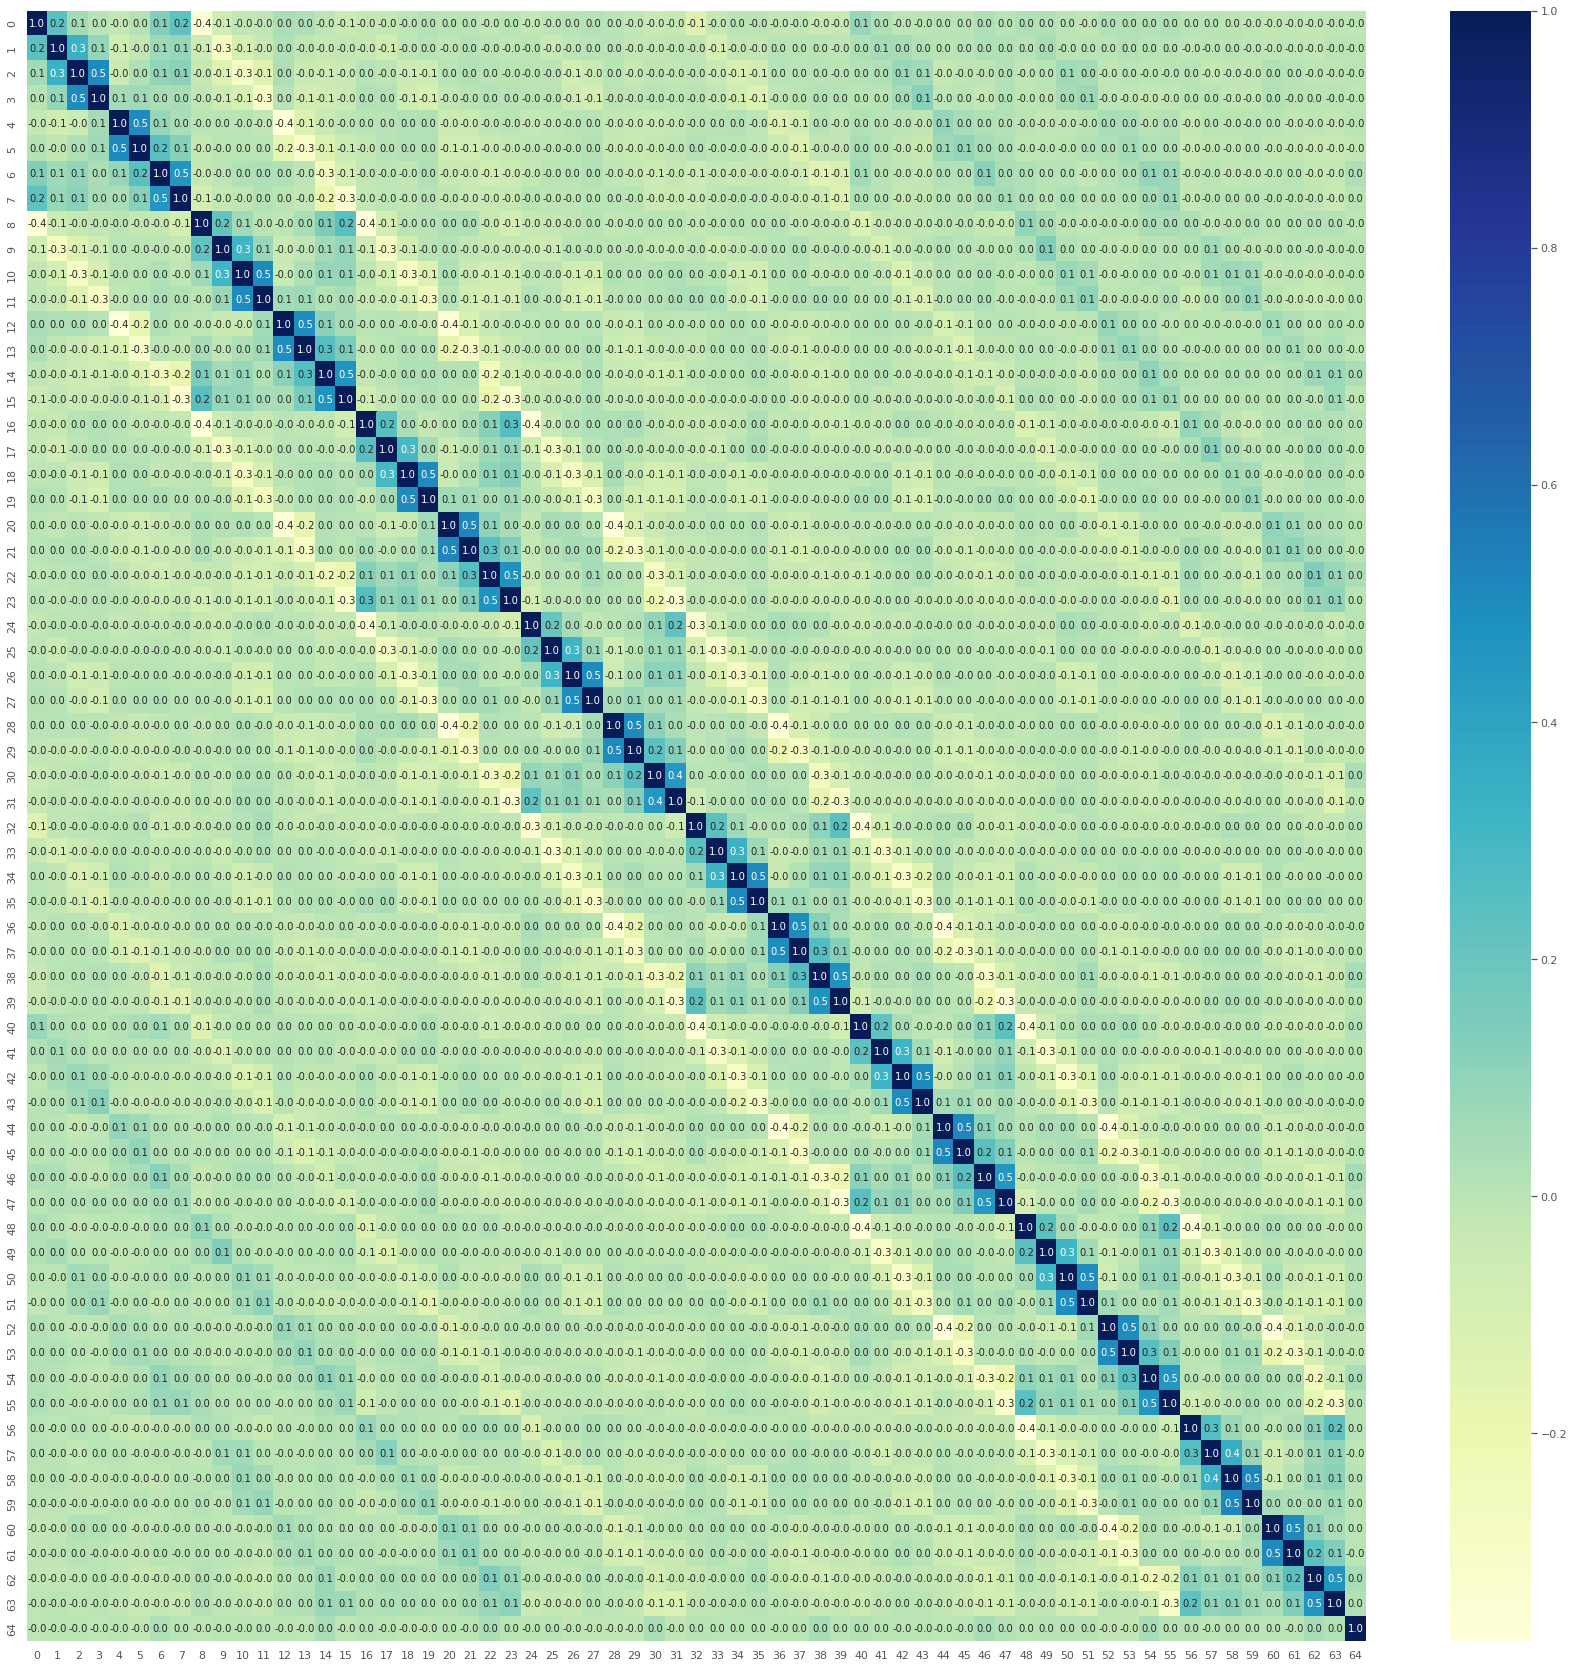

In [58]:
corr = df_cls.corr()
plt.rcParams['figure.figsize'] = (30,30)
ax = sns.heatmap(corr, annot=True, fmt="1.1f", cmap="YlGnBu")

### **Observation**
- There is high ***positive correlation*** between adjacent columns
- There is high ***negative correlation*** between columns seperated by $7$ other columns
- In the correlation matrix, the values of the correlations are similar along the $45^o$ downward sloping line.

### **Train-Validation-Test split**

The initial dataset is splitted in a 70-15-15 split into training, testing and validation datasets.

In [59]:
nump_Y_df = df_cls[64].to_numpy()
nump_Y_df = nump_Y_df.reshape(-1,1)

In [60]:
nump_X_df = df_cls.drop(columns=[64]).to_numpy()

In [61]:
nump_X_df = nump_X_df - sum(nump_X_df)/nump_X_df.shape[0]
nump_X_df = nump_X_df/sum(nump_X_df**2/nump_X_df.shape[0])**0.5
nump_X_df.shape

(11678, 64)

In [62]:
X_train, X_testval, y_train, y_testval = train_test_split(nump_X_df, nump_Y_df, test_size=0.3, random_state=42)

In [63]:
X_val, X_test, y_val, y_test = train_test_split(X_testval, y_testval, test_size = 0.5, random_state = 42)

In [64]:
print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)

(8174, 64)
(8174, 1)
(1752, 64)
(1752, 1)
(1752, 64)
(1752, 1)


## **Support Vector Machine with Gaussian Kernel** for classification
- SVM shows second highest accuracy amongst all the three models and is alost the same as the best.
- The validation and test scores are close, so there is no problem of overfitting.
- In a $4$ class classification problem the expected accuracy of a random classifier is 0.25. Hence a classification accurcay of 0.89 is good for real-life usage.

In [65]:
from sklearn.svm import SVC

In [66]:
tuning_params = {'C' : 2**np.array(list(range(0,16,3)))/(2**10), 'gamma' : 2**np.array(list(range(0,10,3)))/(32*X_train.var()) }

In [67]:
def grid_search_svmc(tuning_params, X_train,y_train,X_val,y_val):
  param_scores = []
  best_score = 0
  best_params = None
  best_model  = None
  num_train_steps = len(tuning_params['C'])*len(tuning_params['gamma'])
  progress_bar = tqdm(range(num_train_steps))
  for C in tuning_params['C']:
    for gamma in tuning_params['gamma']:
      model = SVC(kernel = 'rbf', C=C, gamma = gamma,decision_function_shape='ovo')
      model.fit(X_train,y_train.reshape(-1))
      val_score = model.score(X_val,y_val.reshape(-1))
      params = {'C':C, 'gamma':gamma, 'val_score' : val_score}
      param_scores .append(params)
      if(val_score>=best_score):
        best_score = val_score
        best_params = params
        best_model = model
      progress_bar.update(1)
  return param_scores,best_score, best_params, best_model

In [68]:
svc_param_scores, svc_best_score, svc_best_params, svc_best_model = grid_search_svmc(tuning_params,X_train,y_train,X_val,y_val)

  0%|          | 0/24 [00:00<?, ?it/s]

In [69]:
print('Model accuracy on validation set - {}'.format(svc_best_score))

Model accuracy on validation set - 0.8955479452054794


In [70]:
svc_best_params

{'C': 4.0, 'gamma': 0.03158232405487394, 'val_score': 0.8955479452054794}

In [71]:
print('Model accuracy on validation set - {}'.format(svc_best_model.score(X_test,y_test)))

Model accuracy on validation set - 0.882420091324201


## **K-nearest neighbors** for classification
- KNN shows lowest accuracy amongst all the three models.
- The validation and test scores are close, so there is no problem of overfitting.
- A classification accurcay of 0.65 is not good for real-life usage.

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
tuning_params = {'n_neighbors' : list(range(1,50,5)), 'leaf_size': list(range(1,50,5)), 'p' : [1,2]}

In [74]:
def grid_search_knnc(tuning_params, X_train,y_train,X_val,y_val):
  param_scores = []
  best_score = 0
  best_params = None
  best_model  = None
  num_train_steps = len(tuning_params['n_neighbors'])*len(tuning_params['leaf_size'])*len(tuning_params['p'])
  progress_bar = tqdm(range(num_train_steps))
  for n_neighbors in tuning_params['n_neighbors']:
    for leaf_size in tuning_params['leaf_size']:
      for p in tuning_params['p']:
        model = KNeighborsClassifier(n_neighbors = n_neighbors, leaf_size= leaf_size, p = p)
        model.fit(X_train,y_train.reshape(-1))
        val_score = model.score(X_val,y_val.reshape(-1))
        params = {'n_neighbors':n_neighbors,'leaf_size':leaf_size, 'p':p, 'val_score' : val_score}
        param_scores .append(params)
        if(val_score>=best_score):
          best_score = val_score
          best_params = params
          best_model = model
        progress_bar.update(1)
  return param_scores, best_score, best_params, best_model

In [75]:
knnc_param_scores, knnc_best_score, knnc_best_params, knnc_best_model = grid_search_knnc(tuning_params, X_train,y_train,X_val,y_val)

  0%|          | 0/200 [00:00<?, ?it/s]

In [76]:
print('Model accuracy on VALIDATION set - {}'.format(knnc_best_score))

Model accuracy on VALIDATION set - 0.6518264840182648


In [77]:
knnc_best_params

{'leaf_size': 46, 'n_neighbors': 6, 'p': 2, 'val_score': 0.6518264840182648}

In [78]:
print('Model accuracy on TEST set - {}'.format(knnc_best_model.score(X_test,y_test)))

Model accuracy on TEST set - 0.66837899543379


## **Random Forests for classification**
- Random Forests shows highest accuracy amongst all the three models.
- The validation and test scores are close, so there is no problem of overfitting.
- Hence a classification accurcay of 0.91 is good for real-life usage.

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
tuning_params = {'n_estimators': list(range(50,200,25)),
                 'max_features': ['sqrt','log2'],
                 'min_samples_split' : [5, 10, 15]}

In [81]:
def grid_search_random_forest(tuning_params, X_train,y_train,X_val,y_val):
  param_scores = []
  best_score = 0
  best_params = None
  best_model  = None
  num_train_steps = 1
  for key in tuning_params.keys():
    num_train_steps *= len(tuning_params.keys())
  progress_bar = tqdm(range(num_train_steps))
  for n_estimators in tuning_params['n_estimators']:
    for max_features in tuning_params['max_features']:
      for min_samples_split in tuning_params['min_samples_split']:
          model = RandomForestClassifier(n_estimators = n_estimators, max_features=max_features, min_samples_split=min_samples_split)
          model.fit(X_train,y_train.reshape(-1))
          val_score = model.score(X_val,y_val.reshape(-1))
          params = {'n_estimators':n_estimators, 'max_features': max_features, 'min_samples_split': min_samples_split, 'val_score' : val_score}
          param_scores .append(params)
          if(val_score>=best_score):
            best_score = val_score
            best_params = params
            best_model = model
          progress_bar.update(1)
  return param_scores, best_score, best_params, best_model

In [82]:
rf_param_scores, rf_best_score, rf_best_params, rf_best_model = grid_search_random_forest(tuning_params, X_train,y_train,X_val,y_val)

  0%|          | 0/27 [00:00<?, ?it/s]

In [83]:
print('Model accuracy on VALIDATION set - {}'.format(rf_best_score))

Model accuracy on VALIDATION set - 0.9257990867579908


In [84]:
rf_best_params

{'max_features': 'log2',
 'min_samples_split': 5,
 'n_estimators': 150,
 'val_score': 0.9257990867579908}

In [85]:
print('Model accuracy on VALIDATION set - {}'.format(rf_best_model.score(X_test,y_test)))

Model accuracy on VALIDATION set - 0.9223744292237442


In [86]:
pd.DataFrame(rf_param_scores)['val_score'].std()

0.004067013274275849

# **Q5** 
# **Dimensionality Reduction using PCA**

In [87]:
from sklearn.decomposition import PCA

In [88]:
X = df_cls.drop(columns=[64]).to_numpy()

In [89]:
def L2_norm_std(x):
  l2_norm = (sum((x**2).T)**0.5).reshape(-1)
  return (sum(l2_norm**2)/len(l2_norm) - (sum(l2_norm)/len(l2_norm))**2)**0.5

In [90]:
def RMSE_reconstruction_error(red_x,x):
  return ((sum(((red_x-x)**2).reshape(-1))/x.shape[0])/(sum(x.reshape(-1)**2).T))**0.5

In [91]:
# Calcuulate L2 norm std deviation
l2normstd = L2_norm_std(X)
print('L2 norm Standard deviation =', l2normstd)

L2 norm Standard deviation = 50.94542928609868


In [92]:
# Calculate RMSE reconstruction error for all dimensions from 1 to 64
y = []
for i in range(1,64+1):
  pca = PCA(n_components=i)
  pca.fit(X)
  X_transform = pca.transform(X)
  X_inv = pca.inverse_transform(X_transform)
  y.append(RMSE_reconstruction_error(X_inv,X))

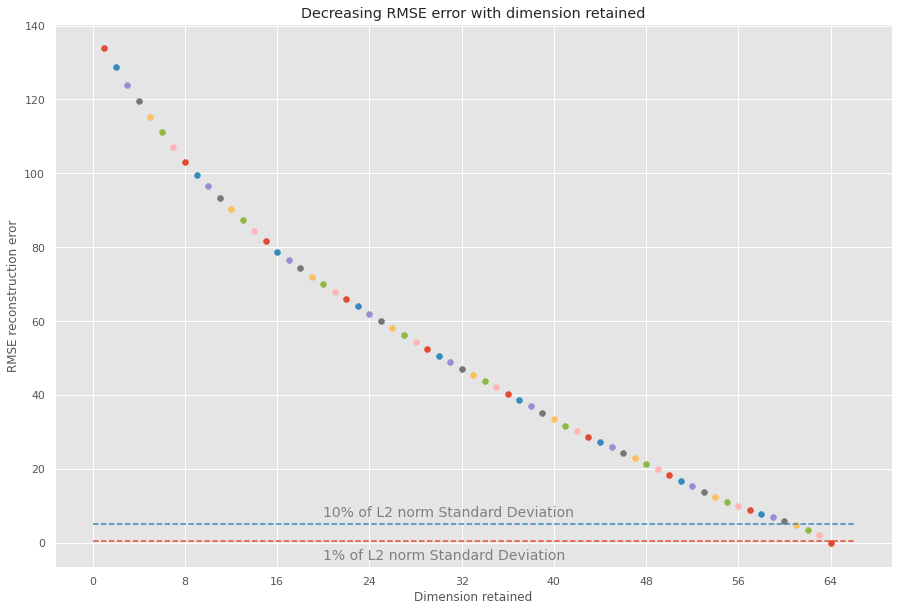

In [93]:
plt.rcParams['figure.figsize'] = (15,10)
for i in range(0,64):
  plt.scatter(i+1,y[i])

plt.ylabel('RMSE reconstruction eror')
plt.xlabel('Dimension retained')

plt.title('Decreasing RMSE error with dimension retained')
crtr = 10
plt.xticks(np.arange(0,65,8))
plt.plot([0,66],[l2normstd/100,l2normstd/100], '--')
plt.plot([0,66],[l2normstd*crtr/100,l2normstd*crtr/100], '--')
style = dict(size=10, color='gray', fontsize = 14)
plt.text(20, l2normstd/100 - 5, '1% of L2 norm Standard Deviation', **style)
plt.text(20, l2normstd*crtr/100 + 2, '{}% of L2 norm Standard Deviation'.format(crtr), **style)
pass

### **Observation**
- *RMSE reconstruction error* cannot be less than the $1\%$ of the *L2 norm standard deviation* for any amount of dimension reduction.
- If we use the weaker criteria of $10\%$ of the *L2 norm standard deviation*, then $61$ dimension is an appropriate choice.